<img src='https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/tools/frameworks/-/raw/main/img/Standard_banner.png' align='right' width='100%'/>

<font color="#138D75">**Copernicus Marine Training Service**</font> <br>
**Copyright:** 2023 EUMETSAT <br>
**License:** MIT <br>
**Authors:** Anna-Lena Erdmann (EUMETSAT)

<div class="alert alert-block alert-success">
<h3>xcube Viewer: Introduction</h3></div>

<div class="alert alert-block alert-warning">
    
<b>PREREQUISITES </b>
    
This notebook has the following prerequisites:
  - **<a href="https://my.wekeo.eu/user-registration" target="_blank">A WEkEO account</a>** if you are using or plan to use WEkEO.
  -  **local** machine or **virtual machine** where this notebook is executed (it is not possible to execute this notebook in the JupyterHub)
  - some knowledge about the data access through the **<a href="https://github.com/wekeo/wekeo4data/blob/main/wekeo-climetlab/01_WEkEOCliMetLab_Introduction.ipynb" target="_blank">CliMetLab WEkEO Plugins</a>**

</div>
<hr>

# 1 Visualizing WEkEO Datasets on the xcube Viewer

### Data used

| Product Description  | WEkEO HDA ID | WEkEO metadata | CliMetLab ID
|:--------------------:|:-------------:|:-----------------:|:-----------------:|
|Land Surface Temperature: global hourly version 1 |  EO:CLMS:DAT:CGLS_HOURLY_LST_GLOBAL_V1 | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3ACLMS%3ADAT%3ACGLS_HOURLY_LST_GLOBAL_V1" target="_blank">link</a> | wekeo-clms-cgls-hourly-lst-global-v2 |
| ERA5 hourly data on single levels from 1940 to present  | EO:ECMWF:DAT:REANALYSIS_ERA5_SINGLE_LEVELS | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AECMWF%3ADAT%3AREANALYSIS_ERA5_SINGLE_LEVELS" target="_blank">link</a> | wekeo-ecmwf-reanalysis-era5-single-levels |

### Learning outcomes

At the end of this notebook you will know;

* how to create xcube-compatible data cubes from WEkEO data 
* how to create a config file to ingest data to the xcube viewer
* how to visualize data in the xcube viewer

### Outline

The <a href="https://xcube.readthedocs.io/en/latest/index.html" target="_blank">xcube</a> software package has been developed to generate, manipulate, analyse, and publish data cubes from Earth Observation data. This notebook shows how xcube, especially the xcube viewer can be used with EO data coming from WEkEO.

<div class="alert alert-info" role="alert">

## <a id='TOC_TOP'></a>Contents

</div>
    
 1. [Installation](#section0)
 2. [Download Datasets with the CliMetLab Plugin](#section1)
 3. [Creating a Datacube with xArray](#section2)
 4. [Creating a config file](#section3)
 5. [Viewing the Data with xcube Viewer](#section4)

<hr>

<div class="alert alert-info" role="alert">

## 1. <a id='section0'></a>Installation
[Back to top](#TOC_TOP)
    
</div>


### CliMetLab and the CliMetLab WEkEO Plugin
<a href="https://climetlab.readthedocs.io/en/latest/index.html" target="_blank">CliMetLab</a> and the WEkEO Plugins for CliMetLabenable a seamless access to many WEkEO datasets.

Three modules are necessary for the Climetlab access to WEkEO data: 

 - Climetlab Package
 - CliMetLab WEkEO Source Plugin
 - CliMetLab WEkEO ECMWF Plugin


In [ ]:
! pip install climetlab

! pip install climetlab-wekeo-source

! pip install climetlab-wekeo-ecmwf


### xcube package

It is recommended to install xcube into a conda environment using the mamba package manager, which will also automatically install and manage xcube’s dependencies. See also the <a href="https://xcube.readthedocs.io/en/latest/installation.html" target="_blank">xcube installation guide</a>.


In [ ]:
! conda install -c conda-forge mamba -y

! mamba install -c conda-forge xcube=1.2.0 proj=9.1.0 pyproj=3.4.1 -y

We begin by importing all of the libraries that we need to run this notebook. 

In [ ]:
import os
import climetlab as cml 
import xarray as xr

/home/jovyan/.conda-libs/cml/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


**Note, that the WEkEO Plugins are automatically imported when importing the climetlab module!**

<div class="alert alert-info" role="alert">

## 2. <a id='section1'></a>Download Datasets using the CliMetLab Plugin
[Back to top](#TOC_TOP)
    
</div>

In this notebook we will compate the **ERA5 Air temperature reanalysis** with **Land Surface Temperature** data and see whats the difference between the two variables. 

We will download and transform the data to xarray using the CliMetLab WEkEO Plugin.

When using the WEkEO download functions the first time, you will have to enter username and password before the data download.  

In [ ]:
# download dataset
ds_era5 = cml.load_dataset("wekeo-ecmwf-reanalysis-era5-single-levels",
                      product_type = "reanalysis",
                      month= "07",
                      year = "2020",
                      day = "01",
                      time=["00:00", "01:00", "02:00", "03:00", "04:00", "05:00", 
                            "06:00", "07:00", "08:00",  "09:00", "10:00", "11:00", 
                            "12:00", "13:00", "14:00", "15:00", "16:00", "17:00", 
                            "18:00",  "19:00", "20:00", "21:00", "22:00", "23:00"                          
                      ],
                      variable = [
                          "2m_temperature"],
                      format_="netcdf",
                     )

In [ ]:
# convert to xarray
xarr_era5 = ds_era5.to_xarray()

In [ ]:
xarr_era5

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, time: 24)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 2020-07-01 ... 2020-07-01T23:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 dask.array<chunksize=(24, 721, 1440), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2023-10-01 22:18:34 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

From the xarray overview we see, that the longitude is in the range of `[0, 360]`. FOr compatibility reasons we convert it to the range of `[-180, 180]`. 

In [ ]:
xarr_era5.coords['longitude'] = (xarr_era5.coords['longitude'] + 180) % 360 - 180
xarr_era5_reshaped = xarr_era5.sortby(xarr_era5.longitude)

Next, we download the Land Surface Temperature data:

In [ ]:
# download dataset
ds_lst = cml.load_dataset(
    "wekeo-clms-cgls-hourly-lst-global-v1",
    start="2020-07-01T00:00:00Z",
    end="2020-07-01T23:59:59Z",
)

In [ ]:
# convert to xarray
xarr_lst = ds_lst.to_xarray()

In [ ]:
xarr_lst

<xarray.Dataset>
Dimensions:              (time: 23, lat: 3584, lon: 8064)
Coordinates:
  * lat                  (lat) float64 80.0 79.96 79.91 ... -79.87 -79.91 -79.96
  * lon                  (lon) float64 -180.0 -180.0 -179.9 ... 179.9 180.0
  * time                 (time) datetime64[ns] 2020-07-01 ... 2020-07-01T23:0...
Data variables:
    ERRORBAR_LST         (time, lat, lon) float32 dask.array<chunksize=(1, 3584, 8064), meta=np.ndarray>
    LST                  (time, lat, lon) float32 dask.array<chunksize=(1, 3584, 8064), meta=np.ndarray>
    PERCENT_PROC_PIXELS  (time, lat, lon) float32 dask.array<chunksize=(1, 3584, 8064), meta=np.ndarray>
    Q_FLAGS              (time, lat, lon) float32 dask.array<chunksize=(1, 3584, 8064), meta=np.ndarray>
    TIME_DELTA           (time, lat, lon) float32 dask.array<chunksize=(1, 3584, 8064), meta=np.ndarray>
    crs                  (time) |S1 b'' b'' b'' b'' b'' ... b'' b'' b'' b'' b''
Attributes: (12/31)
    Conventions:                CF-1.6
    institution:                IPMA
    archive_facility:           VITO
    source:                     Data was derived from satellite imagery.
    history:                    2020-07-01T00:28:25Z - Product generation
    comment:                    Land Surface Temperature (LST) is the radiati...
    ...                         ...
    identifier:                 urn:cgls:global:lst_v1_0.045degree:LST_202007...
    references:                 https://land.copernicus.eu/global/products/lst
    platform:                   GOES, MSG, HIMAWARI
    sensor:                     ABI, SEVIRI, AHI
    product_version:            V1.2.1
    contacts:                   https://land.copernicus.eu/global/contact

<div class="alert alert-info" role="alert">

## 3. <a id='section2'></a>Creating a Datacube with xArray
[Back to top](#TOC_TOP)
    
</div>

We have now one xarray for the ERA5 Air Temperature data and one xarray for the LST data. To create a xcube-compatible data cube we will now:

1. **subset** the data to a smaller geographical extent
2. export the data to a local **zarr archive**

In [ ]:
spain_era5 = xarr_era5_reshaped.sel( latitude=slice(44.1, 35.6), longitude = slice(-10, 4))[['t2m']]
spain_era5.attrs["title"] = "Air Temp Spain 2020-07-01"
spain_era5.to_zarr("dc_temp_spain.zarr")

In [ ]:
spain_lst = xarr_lst.sel( lat=slice(44.1, 35.6), lon = slice(-10, 4))[['LST']]
spain_lst.attrs["title"] = "LST Spain 2020-01-01"
spain_era5.to_zarr("dc_lst_spain")

<hr>
<div class="alert alert-info" role="alert">

## 4. <a id='section3'></a>Creating a config file
[Back to top](#TOC_TOP)

</div>


To add data cubes to the xcube viewer, they have to be defined in a config file. We have the datacubes stored locally, which is why we will now create a **config file for locally stored data cubes**. For remotely stored objects (e.g. on a s3 bucket) please refer to the documentation. 

The config file is stored with the name ``config.yml`` in the same directory as the datacubes. In our case this is the working directory. 

Two main parts of the config file is the ``Datasets``description and the ``Styles`` description. 

The ``Datasets`` description contains:
* **Identifier**   *unique name for the datacube*
* **Title**   *this is what the cube will be called in the Viewer*
* **BoundingBox** *spatial extent of the dataset*
* **FileSystem** *local or remote*
* **Path** *file name of cube in directory*
* **Style** *identifier of the style as defined below*
* **TimeSeriesDataset** *type of time series*


The ``Style`` description contains:
* **Identifier** *unique name for the style*
* **ColorMappings** 
    * **VariableName** *must be identical to the variable name in the cube*
        * **ColorBar** *name of colorbar as in matplotlib*
        * **ValueRange** *range of the dataset*

In [ ]:
'''
DatasetChunkCacheSize: 100M

Datasets:
    - Identifier: local1
      Title: LST Spain Cube
      BoundingBox: [-10, 35, 4, 44]
      FileSystem: file
      Path: dc_lst_spain.zarr
      Style: temp
      TimeSeriesDataset: local_ts
    - Identifier: local2
      Title: Air Temp Spain Cube
      BoundingBox: [-10, 35, 4, 44]
      FileSystem: file
      Path: dc_temp_spain.zarr
      Style: temp
      TimeSeriesDataset: local_ts
Styles:
    - Identifier: temp
      ColorMappings:
          LST:
              ColorBar: "inferno"
              ValueRange: [250., 330.]
          t2m:
              ColorBar: "inferno"
              ValueRange: [250., 330.]
                                   
'''

You can copy the content of the config file (without the ' ' ' ) to the ``config.yml`` file in your directory.

<hr>
<div class="alert alert-info" role="alert">

## 4. <a id='section4'></a>Viewing the Data with xcube Viewer
[Back to top](#TOC_TOP)

</div>


Now open a terminal and go to the directory where you store the data cubes and the config file.

Execute:

``xcube serve -c config.yml --verbose &``

The Output will look like this: 

``Loaded service API 'auth'``

``Loaded service API 'styles'``

``...``

``Applying initial configuration...``

``Starting service...``

``Service running, listening on 0.0.0.0:8080``

``Try http://127.0.0.1:8080/openapi.html``

``Press CTRL+C to stop service``

**http://127.0.0.1:8080/** is the server endpoint in this case.


Access the viewer via the **server endpoint** **/viewer**, hence http://127.0.0.1:8080/viewer in this example. 

<font color="#138D75">**Open this link in your web browser and your data cubes appear in the xcube Viewer!**</font>

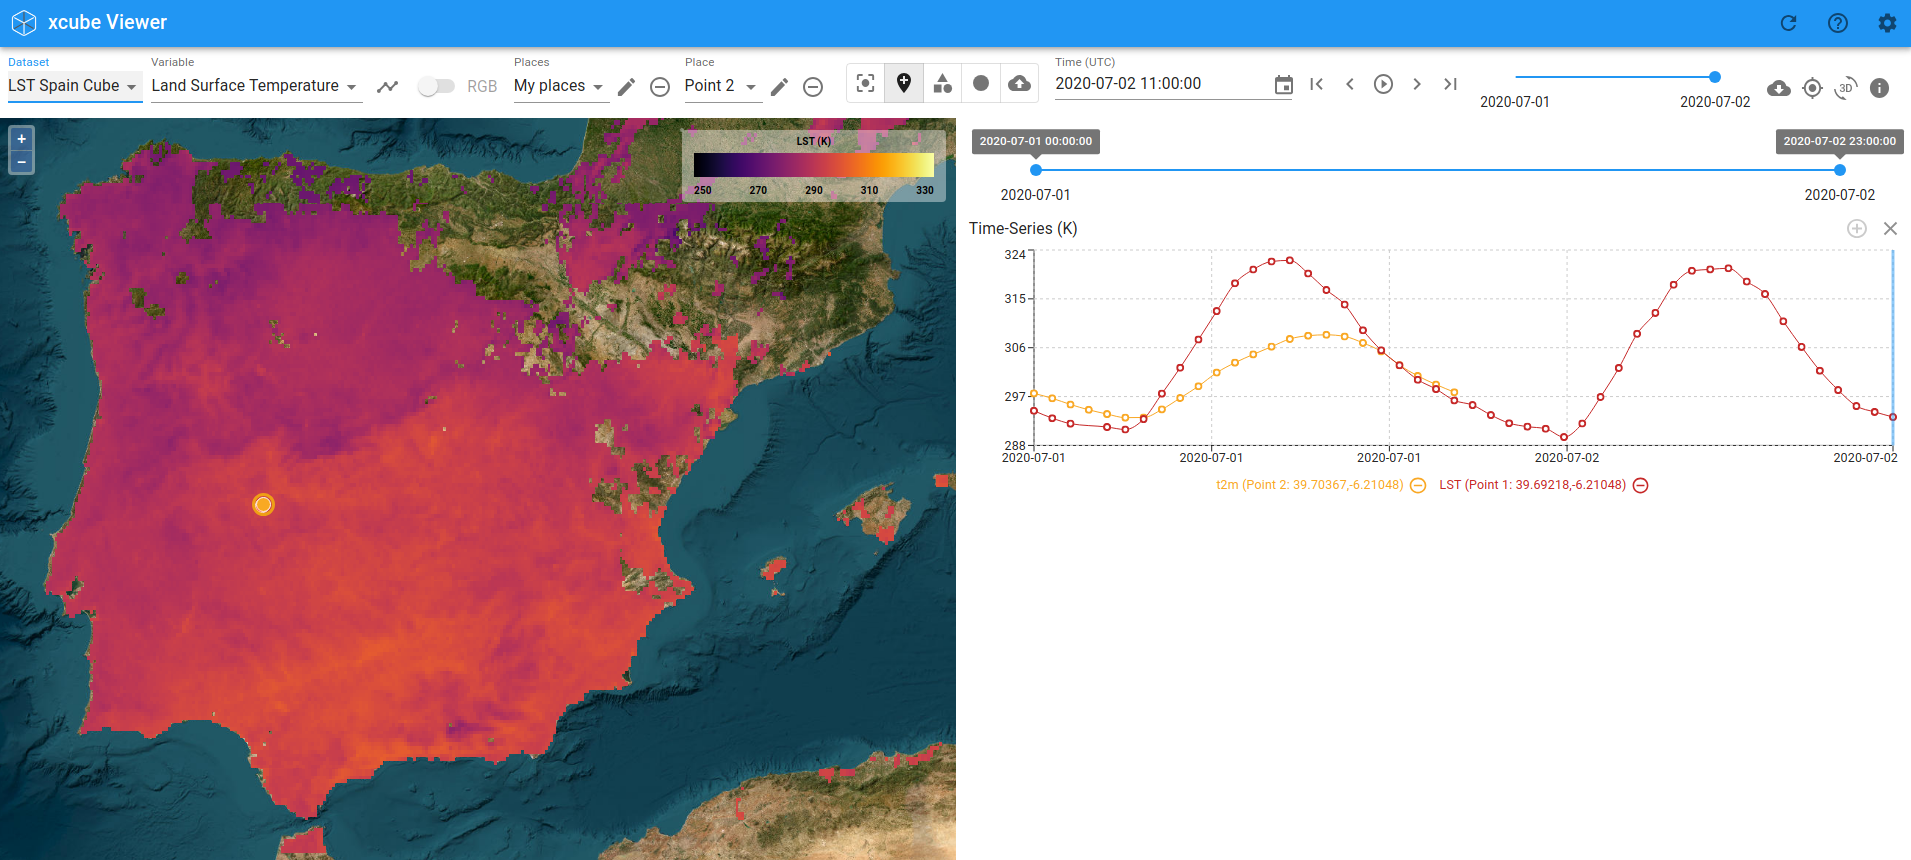